In [33]:
import gammapy 
print(f'loaded gammapy version: {gammapy.__version__} ' )
print(f'Supposed to be 1.0 (21-11-2022)' )

loaded gammapy version: 0.1.dev19056+g5a5f803 
Supposed to be 1.0 (21-11-2022)


In [36]:
#get_ipython().system('jupyter nbconvert --to script 1-Nui_Par_Fitting.ipynb')
import pyximport

pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy

# from gammapy.datasets import MapDataset
from gammapy.maps import Map

from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets#, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    create_crab_spectral_model,
    SkyModel,
    PointSpatialModel,
    ShellSpatialModel,
    GeneralizedGaussianSpatialModel,
    TemplateSpatialModel,
    LogParabolaSpectralModel,
    GaussianSpatialModel,
    DiskSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
    ExpCutoffPowerLawSpectralModel,
    #PowerLawNuisanceSpectralModel,
    #PowerLawNormNuisanceSpectralModel
)
from gammapy.estimators import TSMapEstimator, ExcessMapEstimator

from regions import CircleSkyRegion, RectangleSkyRegion
import yaml
import sys
sys.path.append('/home/katrin/Documents/nuisance_summary/E_reco/')

from Dataset_Creation import sys_dataset
import Dataset_load

## Read dataset

In [37]:
dataset_asimov = Dataset_load.create_asimov()

## Single Cases

In [5]:
true_energy = dataset_asimov.exposure.geom.axes[0].center.value

bias = [0.1]
sigma = 0.0


datasets = []
datasets_N = []

for b in bias:

    sys = sys_dataset(dataset_asimov= dataset_asimov,
                            shift = 0, 
                            tilt = 0,
                              bias = b, 
                             sigma = sigma,
                            rnd = False,
                     e_reco_creation=10,
                     cutoff = True)
    zero = 1e-12
    penalising_invcovmatrix = np.zeros((2, 2))
    if b ==0 :
        b_ = zero
    else:
        b_ = b
    np.fill_diagonal(penalising_invcovmatrix, [1/b_**2, 1/zero**2])

    dataset = sys.create_dataset()
    dataset_N = sys.create_dataset_N(e_reco_n = 10)
    dataset_N.models.parameters['resolution'].frozen = True

    dataset_N.penalising_invcovmatrix = penalising_invcovmatrix

    datasets.append(dataset)
    datasets_N.append(dataset_N)



in map: 0.0
evaluate: 0.0 0.1
10
in map: 0.0
evaluate: 0.0 0.1
10


In [6]:
%%time
fits = []
for dataset in datasets:
    fit = Fit(store_trace=False)
    minuit_opts = {"tol": 0.1, "strategy": 2}
    fit.optimize_opts = minuit_opts
    result = fit.run(dataset)
    print(result)
    
    fits.append(fit)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully.
	nfev       : 92
	total stat : -752490.88

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.

CPU times: user 966 ms, sys: 0 ns, total: 966 ms
Wall time: 965 ms


In [7]:
%%time
fits_N = []
for dataset_N in datasets_N:
    fit_N = Fit(store_trace=False)
    minuit_opts = {"tol": 0.1, "strategy": 2}
    fit_N.optimize_opts = minuit_opts
    result_N = fit_N.run(dataset_N)
    fits_N.append(fit_N)

in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.4235653591775782
10
in map: 0.0
evaluate: 0.0 -0.4235653591775782
10
in map: 0.0
evaluate: 0.0 0.04235653591775782
10
in map: 0.0
evaluate: 0.0 -0.04235653591775782
10
in map: 0.0
evaluate: 0.0 0.01897247793386997
10
in map: 0.0
evaluate: 0.0 -0.01897247793386997
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.01897247793386997
10
in map: 0.0
evaluate: 0.0 -0.01897247793386997
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0
evaluate: 0.0 0.0
10
in map: 0.0


in map: 0.0
evaluate: 0.0 -0.04114851088526311
10
in map: 0.0
evaluate: 0.0 -0.0008594521062922807
10
in map: 0.0
evaluate: 0.0 -0.033832977714868775
10
in map: 0.0
evaluate: 0.0 -0.02942313457962438
10
in map: 0.0
evaluate: 0.0 -0.020822521229588237
10
in map: 0.0
evaluate: 0.0 -0.01856042996482957
10
in map: 0.0
evaluate: 0.0 -0.017803846132264118
10
in map: 0.0
evaluate: 0.0 -0.01752335853561837
10
in map: 0.0
evaluate: 0.0 -0.01741547860769823
10
in map: 0.0
evaluate: 0.0 -0.01737340266055395
10
in map: 0.0
evaluate: 0.0 -0.01735690329590483
10
in map: 0.0
evaluate: 0.0 -0.017350419139435715
10
in map: 0.0
evaluate: 0.0 -0.017347868971111978
10
in map: 0.0
evaluate: 0.0 -0.017346865656609124
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.0008594521062

in map: 0.0
evaluate: 0.0 0.0029072716909465737
10
in map: 0.0
evaluate: 0.0 -0.03759970151210763
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01329551759027511
10
in map: 0.0
evaluate: 0.0 -0.02139691223088595
10
in map: 0.0
evaluate: 0.0 -0.016536075446519447
10
in map: 0.0
evaluate: 0.0 -0.018156354374641612
10
in map: 0.0
evaluate: 0.0 -0.01718418701776831
10
in map: 0.0
evaluate: 0.0 -0.01750824280339275
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 0.0029072716909465737

In [8]:
fits[0].minuit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7.525e+05                 │              Nfcn = 92               │
│ EDM = 0.00012 (Goal: 0.0002)     │            time = 0.9 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name            │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_000_index   │   2.61    │   0.15    │            │            │         │         │       │
│ 1 │ par_001_lambda_ │    0.5    │    0.4    │            │            │         │         │       │
└───┴─────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────────────┬─────────────────────────────────┐
│                 │   par_000_index par_001_lambda_ │
├─────────────────┼─────────────────────────────────┤
│   par_000_index │           0.024         -0.0416 │
│ par_001_lambda_ │         -0.0416           0.135 │
└─────────────────┴─────────────────────────────────┘

In [9]:
fits_N[0].minuit

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7.525e+05                 │              Nfcn = 354              │
│ EDM = 0.00687 (Goal: 0.0002)     │           time = 85.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬─────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name            │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_000_index   │   2.53    │   0.19    │            │            │         │         │       │
│ 1 │ par_001_lambda_ │    0.6    │    0.4    │            │            │         │         │       │
│ 2 │ par_002_bias    │   -0.02   │   0.06    │            │            │         │         │       │
└───┴─────────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────────────┬─────────────────────────────────────────────────┐
│                 │   par_000_index par_001_lambda_    par_002_bias │
├─────────────────┼─────────────────────────────────────────────────┤
│   par_000_index │          0.0377         -0.0535         0.00693 │
│ par_001_lambda_ │         -0.0535           0.152        -0.00465 │
│    par_002_bias │         0.00693        -0.00465         0.00356 │
└─────────────────┴─────────────────────────────────────────────────┘

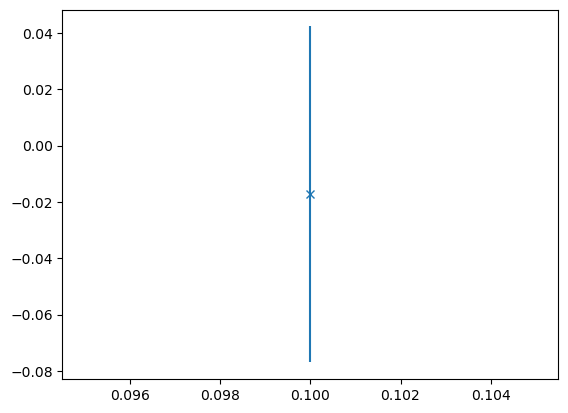

In [10]:
for i, d in enumerate( datasets_N):
    value = d.irf_model.parameters['bias'].value
    error = d.irf_model.parameters['bias'].error
    plt.errorbar(bias[i], value, yerr = error, fmt = 'x')
    

## Stat Profiles for Source Index

In [28]:
computing_norm = 1
def make_writable(stat):
    write = dict()
    for k in stat.keys():
        if k != 'fit_results':
            write[k] = [float(i) for i in stat[k]]
            
                
    return write

In [29]:
%%time
computing_index = 1

if computing_index:
    sigma = 4
    parameter_i = datasets[0].models.parameters['index']
    parameter_i.scan_n_sigma = sigma
    stat_profile_i = fit.stat_profile([datasets[0]], parameter_i, reoptimize= True)
    stat_profile_i['scale_scan'] = stat_profile_i.pop(next(iter(stat_profile_i)) )    
    with open('data/5_scan_index.yaml', 'w') as file:
        documents = yaml.dump(make_writable(stat_profile_i), file)
    
else:
    with open('data/5_scan_index.yaml') as file:
        stat_profile_i = yaml.load( file, Loader=yaml.FullLoader)

    
    

CPU times: user 5.62 s, sys: 8.96 ms, total: 5.63 s
Wall time: 5.64 s


In [30]:
%%time
computing_index_N = 1
if computing_index_N:
    sigma = 4
    parameter_i = datasets_N[0].models.parameters['index']
    parameter_i.scan_n_sigma = sigma
    stat_profile_N_i = fit.stat_profile([datasets_N[0]], parameter_i, reoptimize = True)
    stat_profile_N_i['scale_scan'] = stat_profile_N_i.pop(next(iter(stat_profile_N_i)) )    
    
    with open('data/5_scan_index_N.yaml', 'w') as file:
        documents = yaml.dump(make_writable(stat_profile_N_i), file)
    
else:
    with open('data/5_scan_index_N.yaml') as file:
        stat_profile_N_i = yaml.load( file, Loader=yaml.FullLoader)

    
    

in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 0.00792470409312853
10
in map: 0.0
evaluate: 0.0 -0.04261713391428959
10
in map: 0.0
evaluate: 0.0 -0.003557238870748727
10
in map: 0.0
evaluate: 0.0 -0.03113519095041233
10
in map: 0.0
evaluate: 0.0 -0.014650857994824075
10
in map: 0.0
evaluate: 0.0 -0.020041571826336983
10
in map: 0.0
evaluate: 0.0 0.009607354246984013
10
in map: 0.0
evaluate: 0.0 -0.04429978406814507
10
in map: 0.0
evaluate: 0.0 -0.0027452109218647825
10
in map: 0.0
evaluate: 0.0 -0.031947218899296276
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.0027452109218647825
10
in map: 0.0
evaluate: 0.0 -0.03194721889929

in map: 0.0
evaluate: 0.0 -0.09534276545257489
10
in map: 0.0
evaluate: 0.0 -0.09534276545257489
10
in map: 0.0
evaluate: 0.0 -0.09534276545257489
10
in map: 0.0
evaluate: 0.0 -0.09534276545257489
10
in map: 0.0
evaluate: 0.0 -0.09534276545257489
10
in map: 0.0
evaluate: 0.0 -0.08528663767866108
10
in map: 0.0
evaluate: 0.0 -0.1053988932264887
10
in map: 0.0
evaluate: 0.0 -0.05628640420096314
10
in map: 0.0
evaluate: 0.0 -0.13439912670418663
10
in map: 0.0
evaluate: 0.0 -0.0762136732796221
10
in map: 0.0
evaluate: 0.0 -0.11447185762552768
10
in map: 0.0
evaluate: 0.0 -0.06971536124513612
10
in map: 0.0
evaluate: 0.0 -0.12097016966001366
10
in map: 0.0
evaluate: 0.0 -0.07758895603180004
10
in map: 0.0
evaluate: 0.0 -0.11309657487334973
10
in map: 0.0
evaluate: 0.0 -0.06196602842351674
10
in map: 0.0
evaluate: 0.0 -0.08190574488061388
10
in map: 0.0
evaluate: 0.0 -0.08190574488061388
10
in map: 0.0
evaluate: 0.0 -0.08190574488061388
10
in map: 0.0
evaluate: 0.0 -0.057474097033749734
10
i

in map: 0.0
evaluate: 0.0 -0.06538103876194344
10
in map: 0.0
evaluate: 0.0 -0.06743068508604758
10
in map: 0.0
evaluate: 0.0 -0.06743068508604758
10
in map: 0.0
evaluate: 0.0 -0.06743068508604758
10
in map: 0.0
evaluate: 0.0 -0.0656252684433568
10
in map: 0.0
evaluate: 0.0 -0.06923610172873834
10
in map: 0.0
evaluate: 0.0 -0.06593992302659488
10
in map: 0.0
evaluate: 0.0 -0.06892144714550028
10
in map: 0.0
evaluate: 0.0 -0.06619948822764987
10
in map: 0.0
evaluate: 0.0 -0.06866188194444528
10
in map: 0.0
evaluate: 0.0 -0.06641371817457523
10
in map: 0.0
evaluate: 0.0 -0.06844765199751991
10
in map: 0.0
evaluate: 0.0 -0.06659059247702112
10
in map: 0.0
evaluate: 0.0 -0.06827077769507403
10
in map: 0.0
evaluate: 0.0 -0.07025871315167471
10
in map: 0.0
evaluate: 0.0 -0.06871430845913343
10
in map: 0.0
evaluate: 0.0 -0.06805008529721436
10
in map: 0.0
evaluate: 0.0 -0.06773761875062626
10
in map: 0.0
evaluate: 0.0 -0.06762852339689622
10
in map: 0.0
evaluate: 0.0 -0.06762852339689622
10
i

in map: 0.0
evaluate: 0.0 -0.01409195577039201
10
in map: 0.0
evaluate: 0.0 -0.014272441668044597
10
in map: 0.0
evaluate: 0.0 -0.011926124998560968
10
in map: 0.0
evaluate: 0.0 -0.014182198719218305
10
in map: 0.0
evaluate: 0.0 -0.014182198719218305
10
in map: 0.0
evaluate: 0.0 -0.014182198719218305
10
in map: 0.0
evaluate: 0.0 -0.014182198719218305
10
in map: 0.0
evaluate: 0.0 0.011091640491731822
10
in map: 0.0
evaluate: 0.0 -0.039456037930168435
10
in map: 0.0
evaluate: 0.0 0.005683575958694432
10
in map: 0.0
evaluate: 0.0 -0.034047973397131046
10
in map: 0.0
evaluate: 0.0 0.00213359192926329
10
in map: 0.0
evaluate: 0.0 -0.030497989367699898
10
in map: 0.0
evaluate: 0.0 -0.0004462388800035755
10
in map: 0.0
evaluate: 0.0 -0.027918158558433034
10
in map: 0.0
evaluate: 0.0 -0.002436881496594654
10
in map: 0.0
evaluate: 0.0 -0.025927515941841953
10
in map: 0.0
evaluate: 0.0 -0.014182198719218305
10
in map: 0.0
evaluate: 0.0 -0.014182198719218305
10
in map: 0.0
evaluate: 0.0 -0.014182

in map: 0.0
evaluate: 0.0 -0.03253397344044385
10
in map: 0.0
evaluate: 0.0 -0.04781814495876076
10
in map: 0.0
evaluate: 0.0 -0.033335996826370264
10
in map: 0.0
evaluate: 0.0 -0.04701612157283434
10
in map: 0.0
evaluate: 0.0 -0.034037910762953164
10
in map: 0.0
evaluate: 0.0 -0.04631420763625145
10
in map: 0.0
evaluate: 0.0 -0.03878885108520813
10
in map: 0.0
evaluate: 0.0 -0.040106698793882595
10
in map: 0.0
evaluate: 0.0 -0.04017259117931632
10
in map: 0.0
evaluate: 0.0 -0.04017259117931632
10
in map: 0.0
evaluate: 0.0 -0.04017259117931632
10
in map: 0.0
evaluate: 0.0 -0.03465303142611559
10
in map: 0.0
evaluate: 0.0 -0.04569215093251705
10
in map: 0.0
evaluate: 0.0 -0.03533568301875928
10
in map: 0.0
evaluate: 0.0 -0.04500949933987336
10
in map: 0.0
evaluate: 0.0 -0.035927477050265166
10
in map: 0.0
evaluate: 0.0 -0.04441770530836747
10
in map: 0.0
evaluate: 0.0 -0.03644255913312656
10
in map: 0.0
evaluate: 0.0 -0.043902623225506074
10
in map: 0.0
evaluate: 0.0 -0.0368922428867644

in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.009349169357027573
10
in map: 0.0
evaluate: 0.0 -0.019059481004467527
10
in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.013233294016003554
10
in map: 0.0
evaluate: 0.0 -0.015175356345491546
10
in map: 0.0
evaluate: 0.0 -0.014010118947798751
10
in map: 0.0
evaluate: 0.0 -0.014398531413696349
10
in map: 0.0
evaluate: 0.0 -0.01416548393415779
10
in map: 0.0
evaluate: 0.0 -0.014243166427337311
10
in map: 0.0
evaluate: 0.0 -0.009349169357027573
10
in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.014204325180747551
10
in map: 0.0
evaluate: 0.0 -0.010519149733758061
10
in map: 0.0
evaluate: 0.0 -0.017

in map: 0.0
evaluate: 0.0 -0.014239306341153765
10
in map: 0.0
evaluate: 0.0 -0.010600401975174601
10
in map: 0.0
evaluate: 0.0 -0.01787821070713293
10
in map: 0.0
evaluate: 0.0 -0.013511525467957933
10
in map: 0.0
evaluate: 0.0 -0.0149670872143496
10
in map: 0.0
evaluate: 0.0 -0.014093750166514598
10
in map: 0.0
evaluate: 0.0 -0.014384862515792934
10
in map: 0.0
evaluate: 0.0 0.003955215488742059
10
in map: 0.0
evaluate: 0.0 -0.014239306341153765
10
in map: 0.0
evaluate: 0.0 -0.014239306341153765
10
in map: 0.0
evaluate: 0.0 -0.014239306341153765
10
in map: 0.0
evaluate: 0.0 0.0042961806220878015
10
in map: 0.0
evaluate: 0.0 -0.03277479330439533
10
in map: 0.0
evaluate: 0.0 -0.01987431901264128
10
in map: 0.0
evaluate: 0.0 -0.016013671026936203
10
in map: 0.0
evaluate: 0.0 -0.014828058293101144
10
in map: 0.0
evaluate: 0.0 -0.014437935302316763
10
in map: 0.0
evaluate: 0.0 -0.014306689865681642
10
in map: 0.0
evaluate: 0.0 -0.014262208242208686
10
in map: 0.0
evaluate: 0.0 -0.01424709

in map: 0.0
evaluate: 0.0 0.02077049296242222
10
in map: 0.0
evaluate: 0.0 0.044604905965083985
10
in map: 0.0
evaluate: 0.0 -0.003063920040239543
10
in map: 0.0
evaluate: 0.0 0.02077049296242222
10
in map: 0.0
evaluate: 0.0 0.02077049296242222
10
in map: 0.0
evaluate: 0.0 0.025537375562954573
10
in map: 0.0
evaluate: 0.0 0.01600361036188987
10
in map: 0.0
evaluate: 0.0 0.02172386948252869
10
in map: 0.0
evaluate: 0.0 0.01981711644231575
10
in map: 0.0
evaluate: 0.0 0.044604905965083985
10
in map: 0.0
evaluate: 0.0 -0.007120109700176438
10
in map: 0.0
evaluate: 0.0 -0.000778309470402645
10
in map: 0.0
evaluate: 0.0 0.0020895391339901016
10
in map: 0.0
evaluate: 0.0 -0.000778309470402645
10
in map: 0.0
evaluate: 0.0 -0.000778309470402645
10
in map: 0.0
evaluate: 0.0 -0.000778309470402645
10
in map: 0.0
evaluate: 0.0 -0.000778309470402645
10
in map: 0.0
evaluate: 0.0 0.008755455730662061
10
in map: 0.0
evaluate: 0.0 -0.010312074671467351
10
in map: 0.0
evaluate: 0.0 0.041578208665198305


in map: 0.0
evaluate: 0.0 -0.00242146176327182
10
in map: 0.0
evaluate: 0.0 -0.012587972370530588
10
in map: 0.0
evaluate: 0.0 0.03484552630885417
10
in map: 0.0
evaluate: 0.0 -0.04985496044265659
10
in map: 0.0
evaluate: 0.0 0.011542340124280728
10
in map: 0.0
evaluate: 0.0 -9.922768207425481e-05
10
in map: 0.0
evaluate: 0.0 -0.0012507555285749187
10
in map: 0.0
evaluate: 0.0 -0.0012507555285749187
10
in map: 0.0
evaluate: 0.0 -0.0012507555285749187
10
in map: 0.0
evaluate: 0.0 -0.0012507555285749187
10
in map: 0.0
evaluate: 0.0 -0.0012507555285749187
10
in map: 0.0
evaluate: 0.0 0.015646093055621594
10
in map: 0.0
evaluate: 0.0 -0.018147604112771432
10
in map: 0.0
evaluate: 0.0 0.012135211131781598
10
in map: 0.0
evaluate: 0.0 -0.014636722188931434
10
in map: 0.0
evaluate: 0.0 0.014763021255092367
10
in map: 0.0
evaluate: 0.0 0.007983992675694326
10
in map: 0.0
evaluate: 0.0 0.09483190517342881
10
in map: 0.0
evaluate: 0.0 0.05479746321426058
10
in map: 0.0
evaluate: 0.0 0.0347802422

in map: 0.0
evaluate: 0.0 0.013943965426067824
10
in map: 0.0
evaluate: 0.0 0.01354195055932868
10
in map: 0.0
evaluate: 0.0 0.03886888716389467
10
in map: 0.0
evaluate: 0.0 0.20735478837107493
10
in map: 0.0
evaluate: 0.0 0.07489431908270652
10
in map: 0.0
evaluate: 0.0 0.04006750777841523
10
in map: 0.0
evaluate: 0.0 0.025727831544024193
10
in map: 0.0
evaluate: 0.0 0.019519925899752613
10
in map: 0.0
evaluate: 0.0 0.016543535258858724
10
in map: 0.0
evaluate: 0.0 0.015104370679647535
10
in map: 0.0
evaluate: 0.0 0.014405648669374502
10
in map: 0.0
evaluate: 0.0 0.014065742916826047
10
in map: 0.0
evaluate: 0.0 0.01390023038381372
10
in map: 0.0
evaluate: 0.0 0.013819598487534668
10
in map: 0.0
evaluate: 0.0 0.013742957992698252
10
in map: 0.0
evaluate: 0.0 0.013742957992698252
10
in map: 0.0
evaluate: 0.0 0.013742957992698252
10
in map: 0.0
evaluate: 0.0 0.03938767645602741
10
in map: 0.0
evaluate: 0.0 -0.011901760470630905
10
in map: 0.0
evaluate: 0.0 0.016552832075775136
10
in map

in map: 0.0
evaluate: 0.0 0.013715702123175117
10
in map: 0.0
evaluate: 0.0 0.013715702123175117
10
in map: 0.0
evaluate: 0.0 0.013715702123175117
10
in map: 0.0
evaluate: 0.0 0.01404896394971348
10
in map: 0.0
evaluate: 0.0 0.013382440296636756
10
in map: 0.0
evaluate: 0.0 0.01704832038855875
10
in map: 0.0
evaluate: 0.0 0.010383083857791487
10
in map: 0.0
evaluate: 0.0 0.01596163669111513
10
in map: 0.0
evaluate: 0.0 0.011469767555235105
10
in map: 0.0
evaluate: 0.0 0.015230456224513828
10
in map: 0.0
evaluate: 0.0 0.012200948021836409
10
in map: 0.0
evaluate: 0.0 0.01473767323764985
10
in map: 0.0
evaluate: 0.0 0.012693731008700387
10
in map: 0.0
evaluate: 0.0 0.013717996467459956
10
in map: 0.0
evaluate: 0.0 0.013716471447639227
10
in map: 0.0
evaluate: 0.0 0.01371602783184901
10
in map: 0.0
evaluate: 0.0 0.013715851585035245
10
in map: 0.0
evaluate: 0.0 0.013715773082958358
10
in map: 0.0
evaluate: 0.0 0.013715736339780125
10
in map: 0.0
evaluate: 0.0 0.013715718744590252
10
in ma

in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.0698964572085082
10
in map: 0.0
evaluate: 0.0 0.06511449617092717
10
in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.0679836727934758
10
in map: 0.0
evaluate: 0.0 0.0670272805859596
10
in map: 0.0
evaluate: 0.0 0.06760111591046931
10
in map: 0.0
evaluate: 0.0 0.06740983746896607
10
in map: 0.0
evaluate: 0.0 0.0698964572085082
10
in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.0675054766897177
10
in map: 0.0
evaluate: 0.0 0.07047914134761674
10
in map: 0.0
evaluate: 0.0 0.06453181203181864
10
in map: 0.0
evaluate: 0.0 0.07119885252575353
10
in map: 0.0
evaluate: 0.0 0.06381210085368184
10
in map: 0.0
evaluate: 0.0 0.07208

in map: 0.0
evaluate: 0.0 0.06679430669423873
10
in map: 0.0
evaluate: 0.0 0.06679430669423873
10
in map: 0.0
evaluate: 0.0 0.06679430669423873
10
in map: 0.0
evaluate: 0.0 0.06679430669423873
10
in map: 0.0
evaluate: 0.0 0.06679430669423873
10
in map: 0.0
evaluate: 0.0 0.06804741954382576
10
in map: 0.0
evaluate: 0.0 0.06554119384465171
10
in map: 0.0
evaluate: 0.0 0.06704492926415614
10
in map: 0.0
evaluate: 0.0 0.06654368412432132
10
in map: 0.0
evaluate: 0.0 0.06684443120822221
10
in map: 0.0
evaluate: 0.0 0.06674418218025525
10
in map: 0.0
evaluate: 0.0 0.0730598709421739
10
in map: 0.0
evaluate: 0.0 0.14048507480706143
10
in map: 0.0
evaluate: 0.0 0.1018662960694363
10
in map: 0.0
evaluate: 0.0 0.08394501539306887
10
in map: 0.0
evaluate: 0.0 0.07533458069895324
10
in map: 0.0
evaluate: 0.0 0.07093701867830424
10
in map: 0.0
evaluate: 0.0 0.068805708779258
10
in map: 0.0
evaluate: 0.0 0.06777133611031894
10
in map: 0.0
evaluate: 0.0 0.06726899753919967
10
in map: 0.0
evaluate: 0.

in map: 0.0
evaluate: 0.0 0.08790597427729184
10
in map: 0.0
evaluate: 0.0 0.08103802094532446
10
in map: 0.0
evaluate: 0.0 0.11881176427114497
10
in map: 0.0
evaluate: 0.0 0.05013223095147134
10
in map: 0.0
evaluate: 0.0 0.08472566608322409
10
in map: 0.0
evaluate: 0.0 0.08456045442794885
10
in map: 0.0
evaluate: 0.0 0.08450622968530436
10
in map: 0.0
evaluate: 0.0 0.0844857334586574
10
in map: 0.0
evaluate: 0.0 0.08447758669582793
10
in map: 0.0
evaluate: 0.0 0.0844742845391782
10
in map: 0.0
evaluate: 0.0 0.08447293552519962
10
in map: 0.0
evaluate: 0.0 0.08447238259370245
10
in map: 0.0
evaluate: 0.0 0.08447215564960116
10
in map: 0.0
evaluate: 0.0 0.08447206256082364
10
in map: 0.0
evaluate: 0.0 0.08447202428091372
10
in map: 0.0
evaluate: 0.0 0.08447199761130815
10
in map: 0.0
evaluate: 0.0 0.08447199761130815
10
in map: 0.0
evaluate: 0.0 0.08447199761130815
10
in map: 0.0
evaluate: 0.0 0.08689787636110678
10
in map: 0.0
evaluate: 0.0 0.08204611886150952
10
in map: 0.0
evaluate: 

In [25]:
sys.path.append(config['path']+'/nuisance_summary/Eff_area')
import upper_limit_18_02

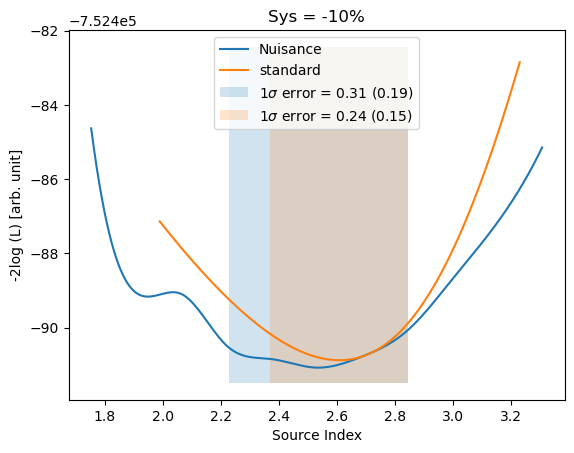

In [32]:
fig = plt.figure()
ll_N_a = stat_profile_N_i.copy()
ul_N_a = upper_limit_18_02.upper_limit(ll_N_a,0,0)
L_N_a, x_N_a = ul_N_a.interpolate()
plt.plot(x_N_a, L_N_a(x_N_a),label = "Nuisance")


ll_a = stat_profile_i.copy()
ul_a = upper_limit_18_02.upper_limit(ll_a,0,0)
L_a, x_a = ul_a.interpolate()
plt.plot(x_a, L_a(x_a),label = "standard")

index_err = datasets[0].models[0].parameters['index'].error
index_err_N = datasets_N[0].models[0].parameters['index'].error



min_, er, upp = ul_N_a.likelihood_upper()
min_ = min_[0]; er = er[0]
ax = plt.gca()
ylim= ax.get_ylim()
ax.fill_between(  [min_-er, min_+ er], ylim[0], ylim[1], alpha = 0.2, 
                label = f'1$\sigma$ error = {er:.2} ({index_err_N:.2})')
min_, er, upp = ul_a.likelihood_upper()
min_ = min_[0]; er = er[0]
ax.fill_between(  [min_-er, min_+ er], ylim[0], ylim[1],  alpha = 0.2, 
                label = f'1$\sigma$ error = {er:.2} ({index_err:.2})')

plt.xlabel("Source Index")
plt.ylabel("-2log (L) [arb. unit]")
plt.legend()
#plt.ylim(ylim[0], ylim[1]-25)
plt.title("Sys = -10%")

fig.savefig("plots/5_stat_scan_index.png")

## Stat Profiles for Source Signal

In [38]:
%%time
computing_amplitude = 1

if computing_amplitude:
    sigma = 3
    parameter_a = datasets[0].models.parameters['amplitude']
    parameter_a.scan_n_sigma = sigma
    stat_profile_a = fit.stat_profile([datasets[0]], parameter_a, reoptimize= True)
    stat_profile_a['scale_scan'] = stat_profile_a.pop(next(iter(stat_profile_a)) )    
    with open('data/5_scan_amplitude.yaml', 'w') as file:
        documents = yaml.dump(make_writable(stat_profile_a), file)
    
else:
    with open('data/5_scan_amplitude.yaml') as file:
        stat_profile_a = yaml.load( file, Loader=yaml.FullLoader)

    
    

CPU times: user 7.36 s, sys: 11.4 ms, total: 7.37 s
Wall time: 7.4 s


In [39]:
%%time
if computing_amplitude:
    sigma = 3
    parameter_a = datasets_N[0].models.parameters['amplitude']
    parameter_a.scan_n_sigma = sigma
    stat_profile_N_a = fit.stat_profile([datasets_N[0]], parameter_a, reoptimize = True)
    stat_profile_N_a['scale_scan'] = stat_profile_N_a.pop(next(iter(stat_profile_N_a)) )    
    
    with open('data/5_scan_amplitude_N.yaml', 'w') as file:
        documents = yaml.dump(make_writable(stat_profile_N_a), file)
    
else:
    with open('data/5_scan_amplitude_N.yaml') as file:
        stat_profile_N_a = yaml.load( file, Loader=yaml.FullLoader)

    
    

in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 0.007927670717697033
10
in map: 0.0
evaluate: 0.0 -0.04262010053885809
10
in map: 0.0
evaluate: 0.0 -6.791978705225077e-06
10
in map: 0.0
evaluate: 0.0 -0.03468563784245583
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -0.01734621491058053
10
in map: 0.0
evaluate: 0.0 -6.791978705225077e-06
10
in map: 0.0
evaluate: 0.0 -0.03468563784245583

in map: 0.0
evaluate: 0.0 -0.01344896938700777
10
in map: 0.0
evaluate: 0.0 -0.016010781624844244
10
in map: 0.0
evaluate: 0.0 -0.01447369428214236
10
in map: 0.0
evaluate: 0.0 -0.014986056729709653
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.008325344911334827
10
in map: 0.0
evaluate: 0.0 -0.008325344911334827
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 -0.014729875505926008
10
in map: 0.0
evaluate: 0.0 0.010544010307154026
10
in map: 0.0
evaluate: 0.0 -0.040003761319006036
10
in map: 0.0
evaluate: 0.0 0.002615

in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 0.01046996329434367
10
in map: 0.0
evaluate: 0.0 -0.04007780836640742
10
in map: 0.0
evaluate: 0.0 0.002550964178980468
10
in map: 0.0
evaluate: 0.0 -0.03215880925104422
10
in map: 0.0
evaluate: 0.0 0.000869396227953454
10
in map: 0.0
evaluate: 0.0 -0.0304772413000172
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.014803922536031876
10
in map: 0.0
evaluate: 0.0 -0.0148039225

in map: 0.0
evaluate: 0.0 -0.015462108861455038
10
in map: 0.0
evaluate: 0.0 -0.014809518690069239
10
in map: 0.0
evaluate: 0.0 -0.014567137045015752
10
in map: 0.0
evaluate: 0.0 -0.014474388937760204
10
in map: 0.0
evaluate: 0.0 -0.014438495838130174
10
in map: 0.0
evaluate: 0.0 -0.014424544557302455
10
in map: 0.0
evaluate: 0.0 -0.014419112843895226
10
in map: 0.0
evaluate: 0.0 -0.01441699667015986
10
in map: 0.0
evaluate: 0.0 -0.014416172069364035
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 0.0018488010144455847
10
in map: 0.0
evaluate: 0.0 -0.030680092458316575
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014

in map: 0.0
evaluate: 0.0 0.0023370605374875278
10
in map: 0.0
evaluate: 0.0 -0.031168351981358512
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 -0.011065104470050888
10
in map: 0.0
evaluate: 0.0 -0.017766186973820097
10
in map: 0.0
evaluate: 0.0 -0.013745537471558572
10
in map: 0.0
evaluate: 0.0 -0.015085753972312415
10
in map: 0.0
evaluate: 0.0 -0.014281624071860108
10
in map: 0.0
evaluate: 0.0 -0.014549667372010877
10
in map: 0.0
evaluate: 0.0 -0.014415645721935494
10
in map: 0.0
evaluate: 0.0 0.002

in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 0.0027469759738653486
10
in map: 0.0
evaluate: 0.0 -0.030993290545800793
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.014123157285967722
10
in map: 0.0
evaluate: 0.0 -0.010749130634001108
10
in map: 0.0
evaluate: 0.0 -0.017497183937934337
10
in map: 0.0
evaluate: 0.0 -0.0134483519555744
10
in map: 0.0
evaluate: 0.0 -0.0147

in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.013615609713370388
10
in map: 0.0
evaluate: 0.0 -0.014142695947317834
10
in map: 0.0
evaluate: 0.0 -0.013826444206949368
10
in map: 0.0
evaluate: 0.0 -0.013931861453738854
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.012561437245475498
10
in map: 0.0
evaluate: 0.0 -0.012561437245475498
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.013879152830344

in map: 0.0
evaluate: 0.0 0.002199820331952085
10
in map: 0.0
evaluate: 0.0 0.002199820331952085
10
in map: 0.0
evaluate: 0.0 -0.3380903197532518
10
in map: 0.0
evaluate: 0.0 -0.11348951410206366
10
in map: 0.0
evaluate: 0.0 -0.0579168356852982
10
in map: 0.0
evaluate: 0.0 -0.03476395324305946
10
in map: 0.0
evaluate: 0.0 -0.023957732678270074
10
in map: 0.0
evaluate: 0.0 -0.018805855144264975
10
in map: 0.0
evaluate: 0.0 -0.016305860222757085
10
in map: 0.0
evaluate: 0.0 -0.015078845877448723
10
in map: 0.0
evaluate: 0.0 -0.014473309901002736
10
in map: 0.0
evaluate: 0.0 -0.01417367356273569
10
in map: 0.0
evaluate: 0.0 -0.014025209055949268
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411

in map: 0.0
evaluate: 0.0 -0.013880812984238763
10
in map: 0.0
evaluate: 0.0 -0.013879817460433217
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 0.002299891232782294
10
in map: 0.0
evaluate: 0.0 -0.03005819689347051
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01064334401771883
1

in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 0.002199820331952085
10
in map: 0.0
evaluate: 0.0 -0.029958125992640305
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.010663358197884871
10
in map: 0.0
evaluate: 0.0 -0.01709494746280335
10
in map: 0.0
evaluate: 0.0 -0.013235993903852264
10
in map: 0.0
evaluate: 0.0 -0.014522311756835958
10
in map: 0.0
evaluate: 0.0 -0.01375052104504574

in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 0.006242953614496525
10
in map: 0.0
evaluate: 0.0 -0.03400125927518475
10
in map: 0.0
evaluate: 0.0 0.003991976190526352
10
in map: 0.0
evaluate: 0.0 -0.03175028185121457
10
in map: 0.0
evaluate: 0.0 0.002299891232782294
10
in map: 0.0
evaluate: 0.0 -0.03005819689347051
10
in map: 0.0
evaluate: 0.0 -0.024073259439134062
10
in map: 0.0
evaluate: 0.0 -0.01684125867173801
10
in map: 0.0
evaluate: 0.0 -0.014949180348779501
10
in map: 0.0
evaluate: 0.0 -0.014291550024023596
10
in map: 0.0
evaluate: 0.0 -0.014041862553376552
10
in map: 0.0
evaluate: 0.0 -0.013943931401402028
10
in map: 0.0
evaluate: 0.0 -0.0139050348213394

in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 0.009200885814606478
10
in map: 0.0
evaluate: 0.0 -0.0369591914752947
10
in map: 0.0
evaluate: 0.0 0.006066366777525052
10
in map: 0.0
evaluate: 0.0 -0.03382467243821327
10
in map: 0.0
evaluate: 0.0 0.0038627607104873497
10
in map: 0.0
evaluate: 0.0 -0.03162106637117557
10
in map: 0.0
evaluate: 0.0 0.002199820331952085
10
in map: 0.0
evaluate: 0.0 -0.029958125992640305
10
in map: 0.0
evaluate: 0.0 -0.027372968702501322
10
in map: 0.0
evaluate: 0.0 -0.018297317298825874
10
in map: 0.0
evaluate: 0.0 -0.015484661404904834
10
in map: 0.0
evaluate: 0.0 -0.014494813964152206
10
in map: 0.0
evaluate: 0.0 -0.01411990946471486
10
in map: 0.0
evaluate: 0.0 -0.013974011915061452
10
in map: 0.0
evaluate: 0.0 -0.013916637382486692
10
in map: 0.0
evaluate: 0.0 -0.013893982467201738
10
in map: 0.0
evaluate: 0.0 -0.01388502233829566
10
in map: 0.0
evaluate: 0.0 -0.013881476465682647
10
in map: 0.0
evaluate: 0.0 -0.013880072672

in map: 0.0
evaluate: 0.0 -0.010646171537337313
10
in map: 0.0
evaluate: 0.0 -0.01711213412335091
10
in map: 0.0
evaluate: 0.0 -0.013232556571742752
10
in map: 0.0
evaluate: 0.0 -0.01452574908894547
10
in map: 0.0
evaluate: 0.0 -0.013749833578623838
10
in map: 0.0
evaluate: 0.0 -0.014008472082064382
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 0.0022857536346898846
10
in map: 0.0
evaluate: 0.0 0.0022857536346898846
10
in map: 0.0
evaluate: 0.0 -0.33863848167830385
10
in map: 0.0
evaluate: 0.0 -0.1135995723759479
10
in map: 0.0
evaluate: 0.0 -0.05795238628487118
10
in map: 0.0
evaluate: 0.0 -0.034778974515087394
10
in map: 0.0
evaluate: 0.0 -0.023965176590322008
10
in map: 0.0
evaluate: 0.0 -0.018809403363511917
10
in map: 0.0
evaluate: 0.0 -0.01630751950837551
10
in map: 0.0
evaluate: 0.0 -0.01507961230569333
10
in map: 0.0
evaluate: 0.0 -0.014473660339286085
10
in map: 0.0
evaluate: 0.0 -0.014173832220921364
10
in map: 0.0
evaluate: 0.0 -0.01402528010

in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 0.5610506808258002
10
in map: 0.0
evaluate: 0.0 0.5610506808258002
10
in map: 0.0
evaluate: 0.0 -0.5074455061701235
10
in map: 0.0
evaluate: 0.0 -0.1533904385623656
10
in map: 0.0
evaluate: 0.0 -0.07469765185427209
10
in map: 0.0
evaluate: 0.0 -0.0426699328573277
10
in map: 0.0
evaluate: 0.0 -0.027857389379494207
10
in map: 0.0
evaluate: 0.0 -0.020767213598868083
10
in map: 0.0
evaluate: 0.0 -0.01728248348297933
10
in map: 0.0
evaluate: 0.0 -0.015564585562266555
10
in map: 0.0
evaluate: 0.0 -0.01471477666844365
10
in map: 0.0
evaluate: 0.0 -0.014293680417329707
10
in map: 0.0
evaluate: 0.0 -0.014084844415183857
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in

in map: 0.0
evaluate: 0.0 -0.013905042955674293
10
in map: 0.0
evaluate: 0.0 -0.01388951485949808
10
in map: 0.0
evaluate: 0.0 -0.01388330230129917
10
in map: 0.0
evaluate: 0.0 -0.013880814631934801
10
in map: 0.0
evaluate: 0.0 -0.01387981830260495
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 0.0022857536346898846
10
in map: 0.0
evaluate: 0.0 -0.030044059295378105
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411
10
in map: 0.0
evaluate: 0.0 -0.01387915283034411

In [40]:
fig = plt.figure()
ll_N_a = stat_profile_N_a.copy()
ul_N_a = upper_limit_18_02.upper_limit(ll_N_a,0,0)
L_N_a, x_N_a = ul_N_a.interpolate()
plt.plot(x_N_a, L_N_a(x_N_a),label = "Nuisance")


ll_a = stat_profile_a.copy()
ul_a = upper_limit_18_02.upper_limit(ll_a,0,0)
L_a, x_a = ul_a.interpolate()
plt.plot(x_a, L_a(x_a),label = "standard")

amplitude_err = datasets[0].models[0].parameters['amplitude'].error
amplitude_err_N = datasets_N[0].models[0].parameters['amplitude'].error



min_, er, upp = ul_N_a.likelihood_upper()
min_ = min_[0]; er = er[0]
ax = plt.gca()
ylim= ax.get_ylim()
ax.fill_between(  [min_-er, min_+ er], ylim[0], ylim[1], alpha = 0.2, 
                label = f'1$\sigma$ error = {er:.2} ({amplitude_err_N:.2})')
min_, er, upp = ul_a.likelihood_upper()
min_ = min_[0]; er = er[0]
ax.fill_between(  [min_-er, min_+ er], ylim[0], ylim[1],  alpha = 0.2, 
                label = f'1$\sigma$ error = {er:.2} ({amplitude_err:.2})')

plt.xlabel("Source amplitude [1/cm2sTeV]")
plt.ylabel("-2log (L) [arb. unit]")
plt.legend()
#plt.ylim(ylim[0], ylim[1]-25)
plt.title("Sys = -10%")

fig.savefig("plots/5_stat_scan_amplitude.png")

ValueError: Expect x to not have duplicates

<Figure size 640x480 with 0 Axes>